# Model Training Evaluation

### By Alina Gonzalez and Jesse Elliott

In [8]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

### Preprocessing

In [24]:
train = pd.read_csv('data/balanced_data.csv')
test = pd.read_csv('data/test.csv')
valid = pd.read_csv('data/validation.csv')

EMOTION_KEY = {0: 'anger', 1: 'fear', 2: 'joy', 3:'love', 4:'sadness', 5: 'surprise'}
train['label_text'] = train['label'].map(EMOTION_KEY)
test['label_text'] = test['label'].map(EMOTION_KEY)
valid['label_text'] = valid['label'].map(EMOTION_KEY)

In [25]:
# tokenize text into sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text'])
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
valid_sequences = tokenizer.texts_to_sequences(valid['text'])

In [26]:
# pad the text sequences
max_length = max([len(seq) for seq in train_sequences])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')

### Models

In [27]:
# a simple feed-forward neural network using sequential dense layers
def simple_ffn(input_shape, output_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(output_shape, activation='softmax')
    ])
    return model

# a recurrent neural network model
def rnn_model(input_shape, output_shape):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=64, input_length=input_shape),
        LSTM(64),
        Dense(output_shape, activation='softmax')
    ])
    return model

# a convolutional neural network model
def cnn_model(input_shape, output_shape):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=64, input_length=input_shape),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(output_shape, activation='softmax')
    ])
    return model

### Training

In [28]:
# func to train the model and output evaluation of training based on the history
def train_and_evaluate(model, train_data, train_labels, valid_data, valid_labels, test_data, test_labels):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels, epochs=10, validation_data=(valid_data, valid_labels), verbose=2)
    loss, accuracy = model.evaluate(test_data, test_labels, verbose=2)
    return history, loss, accuracy

In [29]:
X_train, y_train = train_padded, train['label'].values
X_test, y_test = test_padded, test['label'].values
X_valid, y_valid = valid_padded, valid['label'].values

In [30]:
input_shape = X_train.shape[1:]
output_shape = len(train['label'].unique())
ffn_model = simple_ffn(input_shape, output_shape)
ffn_history, ffn_loss, ffn_accuracy = train_and_evaluate(ffn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
1006/1006 - 1s - loss: 152.9050 - accuracy: 0.1867 - val_loss: 56.8996 - val_accuracy: 0.2105 - 638ms/epoch - 634us/step
Epoch 2/10
1006/1006 - 0s - loss: 37.8993 - accuracy: 0.2137 - val_loss: 29.8906 - val_accuracy: 0.1350 - 407ms/epoch - 405us/step
Epoch 3/10
1006/1006 - 0s - loss: 16.6072 - accuracy: 0.2314 - val_loss: 12.8043 - val_accuracy: 0.1785 - 403ms/epoch - 401us/step
Epoch 4/10
1006/1006 - 0s - loss: 8.5258 - accuracy: 0.2316 - val_loss: 7.0537 - val_accuracy: 0.1760 - 403ms/epoch - 400us/step
Epoch 5/10
1006/1006 - 0s - loss: 5.3003 - accuracy: 0.2296 - val_loss: 5.0575 - val_accuracy: 0.1450 - 400ms/epoch - 398us/step
Epoch 6/10
1006/1006 - 0s - loss: 3.8830 - accuracy: 0.2249 - val_loss: 3.5560 - val_accuracy: 0.1375 - 404ms/epoch - 401us/step
Epoch 7/10
1006/1006 - 0s - loss: 2.8531 - accuracy: 0.2184 - val_loss: 3.0894 - val_accuracy: 0.1035 - 405ms/epoch - 403us/step
Epoch 8/10
1006/1006 - 0s - loss: 2.2853 - accuracy: 0.2214 - val_loss: 2.3563 - val_accur

In [31]:
rnn_input_shape = X_train.shape[1]
rnn_model = rnn_model(rnn_input_shape, output_shape)
rnn_history, rnn_loss, rnn_accuracy = train_and_evaluate(rnn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
1006/1006 - 17s - loss: 1.7936 - accuracy: 0.1659 - val_loss: 1.7833 - val_accuracy: 0.1070 - 17s/epoch - 16ms/step
Epoch 2/10
1006/1006 - 16s - loss: 1.7880 - accuracy: 0.1762 - val_loss: 1.7935 - val_accuracy: 0.0400 - 16s/epoch - 16ms/step
Epoch 3/10
1006/1006 - 16s - loss: 1.7771 - accuracy: 0.1827 - val_loss: 1.7815 - val_accuracy: 0.1420 - 16s/epoch - 15ms/step
Epoch 4/10
1006/1006 - 16s - loss: 1.7885 - accuracy: 0.1735 - val_loss: 1.7845 - val_accuracy: 0.2750 - 16s/epoch - 15ms/step
Epoch 5/10
1006/1006 - 16s - loss: 1.5727 - accuracy: 0.3252 - val_loss: 1.5790 - val_accuracy: 0.3145 - 16s/epoch - 16ms/step
Epoch 6/10
1006/1006 - 16s - loss: 1.1143 - accuracy: 0.5577 - val_loss: 1.5854 - val_accuracy: 0.3870 - 16s/epoch - 16ms/step
Epoch 7/10
1006/1006 - 16s - loss: 0.8361 - accuracy: 0.6970 - val_loss: 1.5698 - val_accuracy: 0.4290 - 16s/epoch - 16ms/step
Epoch 8/10
1006/1006 - 16s - loss: 0.6136 - accuracy: 0.8002 - val_loss: 1.7895 - val_accuracy: 0.4425 - 16s/ep

In [32]:
cnn_model = cnn_model(rnn_input_shape, output_shape)
cnn_history, cnn_loss, cnn_accuracy = train_and_evaluate(cnn_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

Epoch 1/10
1006/1006 - 3s - loss: 0.6825 - accuracy: 0.7484 - val_loss: 0.3435 - val_accuracy: 0.8870 - 3s/epoch - 3ms/step
Epoch 2/10
1006/1006 - 3s - loss: 0.0657 - accuracy: 0.9811 - val_loss: 0.3861 - val_accuracy: 0.8800 - 3s/epoch - 3ms/step
Epoch 3/10
1006/1006 - 3s - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.4247 - val_accuracy: 0.8790 - 3s/epoch - 3ms/step
Epoch 4/10
1006/1006 - 3s - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.4839 - val_accuracy: 0.8775 - 3s/epoch - 3ms/step
Epoch 5/10
1006/1006 - 3s - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.5400 - val_accuracy: 0.8770 - 3s/epoch - 3ms/step
Epoch 6/10
1006/1006 - 3s - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.6177 - val_accuracy: 0.8670 - 3s/epoch - 3ms/step
Epoch 7/10
1006/1006 - 3s - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.6447 - val_accuracy: 0.8705 - 3s/epoch - 3ms/step
Epoch 8/10
1006/1006 - 3s - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.7275 - val_accuracy: 0.8630 - 3s/epoch - 3ms/step
Epoch 9/

In [33]:
print("Simple Feedforward Neural Network - Test Loss:", ffn_loss, "Test Accuracy:", ffn_accuracy)
print("RNN Model - Test Loss:", rnn_loss, "Test Accuracy:", rnn_accuracy)
print("CNN Model - Test Loss:", cnn_loss, "Test Accuracy:", cnn_accuracy)


Simple Feedforward Neural Network - Test Loss: 2.2396912574768066 Test Accuracy: 0.10599999874830246
RNN Model - Test Loss: 2.0991475582122803 Test Accuracy: 0.42149999737739563
CNN Model - Test Loss: 0.7934795618057251 Test Accuracy: 0.8600000143051147


### Visualization

In [34]:
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(model_name)
    plt.legend(loc='lower right')

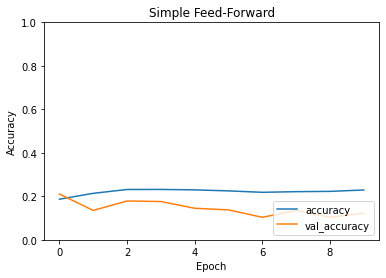

In [35]:
plot_history(ffn_history, 'Simple Feed-Forward')

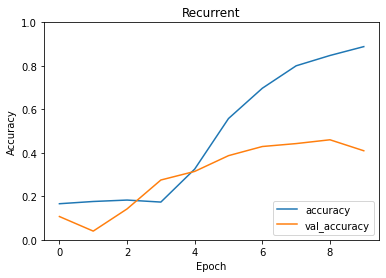

In [36]:
plot_history(rnn_history, 'Recurrent')

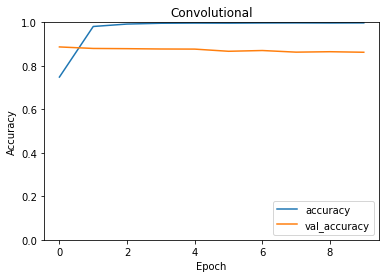

In [37]:
plot_history(cnn_history, 'Convolutional')

In [39]:
ffn_model.save('saved_models/ffn_model.h5')
rnn_model.save('saved_models/rnn_model.h5')
cnn_model.save('saved_models/cnn_model.h5')

# save the tokenizer
import pickle
with open('saved_models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)